In [4]:
import sys
sys.path.append("../src")

import numpy as np
import matplotlib.pyplot as plt
from nptyping import NDArray
from typing import List

from choo_siow_with_penalty import choo_siow_with_penalty

In [5]:
def iterate_choo_siow_penalty(phi : NDArray, n : NDArray, m : NDArray, Z : List[List[int]], \
                                q_min : NDArray, q_max : NDArray, \
                                w1_min : float, w1_max : float, w2_min : float, w2_max : float, grid : int, \
                                T=1.0, output=False):

    w1_list = np.linspace(w1_max, w1_min, grid)
    w2_list = np.linspace(w2_min, w2_max, grid)

    meet_regional_quota = np.zeros(shape=(w1_list.size, w2_list.size), dtype=bool)
    social_welfares = np.zeros(shape=(w1_list.size, w2_list.size), dtype=float)
    agent_welfares = np.zeros(shape=(w1_list.size, w2_list.size), dtype=float)
    penalties = np.zeros(shape=(w1_list.size, w2_list.size), dtype=float)

    for i, w1 in enumerate(w1_list):
        for j, w2 in enumerate(w2_list):
            w = np.array([w1, w2])
            mrq, soc_wel, ag_wel, pn = choo_siow_with_penalty(phi, n, m, Z, q_min, q_max, w, T, maxit=10000, output=output)
            meet_regional_quota[i, j] = mrq
            social_welfares[i, j] = soc_wel
            agent_welfares[i, j] = ag_wel
            penalties[i, j] = pn
    
    np.save("w1_list", w1_list)
    np.save("w2_list", w2_list)
    np.save("meet_regional_quota", meet_regional_quota)
    np.save("social_welfares", social_welfares)
    np.save("agent_welfares", agent_welfares)
    np.save("penalties", penalties)

In [6]:
phi = np.array([
    [2., 1.5, 1.],
    [1.5, 2., 1.]
]).astype(float)

n = np.array([.5, .5])
m = np.array([.3, .3, .4])

Z = [[0, 1], [2]]
q_min = np.array([0.1, 0.05])
q_max = np.array([.5, .4])

w1_min, w1_max = -10.0, 10.0
w2_min, w2_max = -10.0, 10.0
grid = 200

iterate_choo_siow_penalty(
    phi, n, m, Z, q_min, q_max, \
    w1_min, w1_max, w2_min, w2_max, grid
)

In [7]:
w1_list = np.load("w1_list.npy")
w2_list = np.load("w2_list.npy")
meet_regional_quota = np.load("meet_regional_quota.npy")
social_welfares = np.load("social_welfares.npy")
agent_welfares = np.load("agent_welfares.npy")
penalties = np.load("penalties.npy")

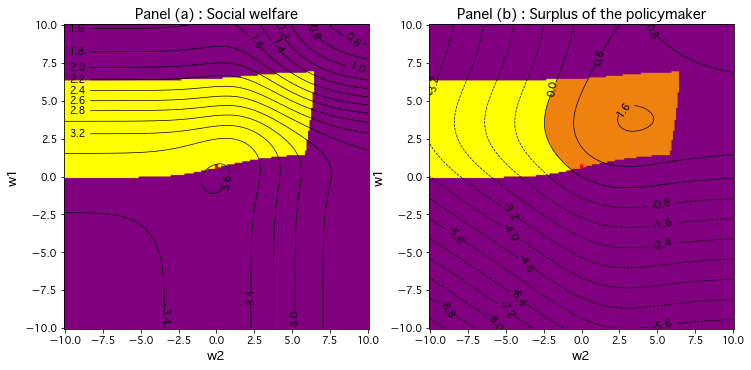

In [13]:
def visualize(w1_list, w2_list, meet_regional_quota, social_welfares, agent_welfares, penalties):
    X, Y = np.meshgrid(w2_list, w1_list)
    w1_half = (w1_list[0] - w1_list[1]) / 2
    w2_half = (w2_list[1] - w2_list[0]) / 2
    fig, ax = plt.subplots(1, 2, figsize=(12, 12))

    rgb0 = np.zeros(shape=(meet_regional_quota.shape[0],meet_regional_quota.shape[1],3), dtype=int)
    rgb1 = np.zeros(shape=(meet_regional_quota.shape[0],meet_regional_quota.shape[1],3), dtype=int)

    yellow = np.array([255, 255, 0], dtype=int)
    purple = np.array([128, 0, 128], dtype=int)
    red = np.array([255, 0, 0], dtype=int)
    orange = np.array([239, 129, 15], dtype=int)

    for i in range(0, meet_regional_quota.shape[0]):
        for j in range(0, meet_regional_quota.shape[1]):
            if meet_regional_quota[i, j]:
                rgb0[i, j, :] = yellow
                if penalties[i, j] >= 0.0:
                    rgb1[i, j, :] = orange
                else:
                    rgb1[i, j, :] = yellow
            else:
                rgb0[i, j, :] = purple
                rgb1[i, j, :] = purple

    x, y = meet_regional_quota.shape[0]//2, meet_regional_quota.shape[1]//2
    while not meet_regional_quota[x, y]:
        x -= 1
    for i in range(x-1, x+2):
        for j in range(y-1, y+1):
            rgb0[i, j, :] = red
            rgb1[i, j, :] = red

    for i in range(2):
        ax[i].set_xlabel("w2", fontsize=13)
        ax[i].set_ylabel("w1", fontsize=13)
    
    ax[0].imshow(rgb0, extent=(w2_list[0]-w2_half, w2_list[-1]+w2_half, w1_list[-1]-w1_half, w1_list[0]+w1_half))
    ax[1].imshow(rgb1, extent=(w2_list[0]-w2_half, w2_list[-1]+w2_half, w1_list[-1]-w1_half, w1_list[0]+w1_half))

    cntr0 = ax[0].contour(X, Y, social_welfares, colors="black", linewidths=0.7, levels=16)
    ax[0].clabel(cntr0, fmt=lambda x : f"{x:.1f}")
    ax[0].set_title("Panel (a) : Social welfare", fontsize=14)

    # cntr1 = ax[1].contour(X, Y, agent_welfares, colors="r", linewidths=0.7, levels=16)
    # ax[1].clabel(cntr1, fmt=lambda x : f"{x:.1f}")
    # ax[1].set_title("Panel (b) : Welfare of Workers and Job slots", fontsize=14)

    cntr2 = ax[1].contour(X, Y, penalties, colors="black", linewidths=0.7, levels=16)
    ax[1].clabel(cntr2, fmt=lambda x : f"{x:.1f}")
    ax[1].set_title("Panel (b) : Surplus of the policymaker", fontsize=14)

    return fig, ax

fig, ax = visualize(w1_list, w2_list, meet_regional_quota, social_welfares, agent_welfares, penalties)

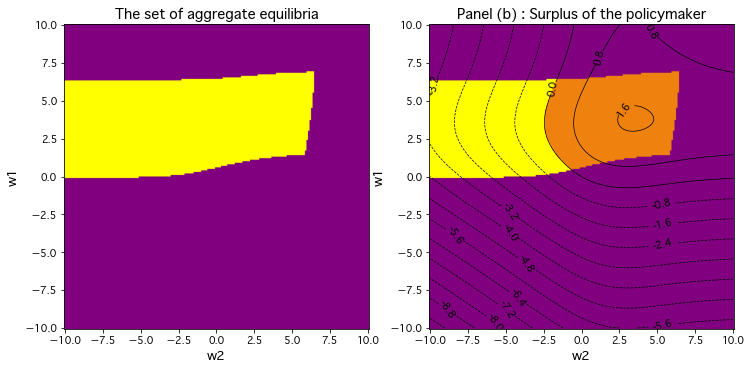

In [12]:
def visualize(w1_list, w2_list, meet_regional_quota, social_welfares, agent_welfares, penalties):
    X, Y = np.meshgrid(w2_list, w1_list)
    w1_half = (w1_list[0] - w1_list[1]) / 2
    w2_half = (w2_list[1] - w2_list[0]) / 2
    fig, ax = plt.subplots(1, 2, figsize=(12, 12))

    rgb0 = np.zeros(shape=(meet_regional_quota.shape[0],meet_regional_quota.shape[1],3), dtype=int)
    rgb1 = np.zeros(shape=(meet_regional_quota.shape[0],meet_regional_quota.shape[1],3), dtype=int)

    yellow = np.array([255, 255, 0], dtype=int)
    purple = np.array([128, 0, 128], dtype=int)
    red = np.array([255, 0, 0], dtype=int)
    orange = np.array([239, 129, 15], dtype=int)

    for i in range(0, meet_regional_quota.shape[0]):
        for j in range(0, meet_regional_quota.shape[1]):
            if meet_regional_quota[i, j]:
                rgb0[i, j, :] = yellow
                if penalties[i, j] >= 0.0:
                    rgb1[i, j, :] = orange
                else:
                    rgb1[i, j, :] = yellow
            else:
                rgb0[i, j, :] = purple
                rgb1[i, j, :] = purple

    x, y = meet_regional_quota.shape[0]//2, meet_regional_quota.shape[1]//2
    while not meet_regional_quota[x, y]:
        x -= 1
    
    """
    for i in range(x-1, x+2):
        for j in range(y-1, y+1):
            rgb0[i, j, :] = red
    """

    for i in range(2):
        ax[i].set_xlabel("w2", fontsize=13)
        ax[i].set_ylabel("w1", fontsize=13)
    
    ax[0].imshow(rgb0, extent=(w2_list[0]-w2_half, w2_list[-1]+w2_half, w1_list[-1]-w1_half, w1_list[0]+w1_half))
    ax[1].imshow(rgb1, extent=(w2_list[0]-w2_half, w2_list[-1]+w2_half, w1_list[-1]-w1_half, w1_list[0]+w1_half))

    #cntr0 = ax[0].contour(X, Y, social_welfares, colors="black", linewidths=0.7, levels=16)
    #ax[0].clabel(cntr0, fmt=lambda x : f"{x:.1f}")
    ax[0].set_title("The set of aggregate equilibria", fontsize=14)

    # cntr1 = ax[1].contour(X, Y, agent_welfares, colors="r", linewidths=0.7, levels=16)
    # ax[1].clabel(cntr1, fmt=lambda x : f"{x:.1f}")
    # ax[1].set_title("Panel (b) : Welfare of Workers and Job slots", fontsize=14)

    cntr2 = ax[1].contour(X, Y, penalties, colors="black", linewidths=0.7, levels=16)
    ax[1].clabel(cntr2, fmt=lambda x : f"{x:.1f}")
    ax[1].set_title("Panel (b) : Surplus of the policymaker", fontsize=14)

    return fig, ax

fig, ax = visualize(w1_list, w2_list, meet_regional_quota, social_welfares, agent_welfares, penalties)